# Logistic Regressions

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [355]:
churnData= pd.read_csv("DATA_Customer-Churn.csv")


In [356]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')


In [357]:
nulls_df = pd.DataFrame(round(churnData.isna().sum()/len(churnData),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,gender,0.00
1,SeniorCitizen,0.00
2,Partner,0.00
3,Dependents,0.00
4,tenure,0.00
5,PhoneService,0.00
6,OnlineSecurity,0.00
7,OnlineBackup,0.00
8,DeviceProtection,0.00
9,TechSupport,0.00


In [358]:
mean_totalcharges= np.mean(churnData["TotalCharges"])
churnData["TotalCharges"]= churnData["TotalCharges"].fillna(mean_totalcharges)
churnData["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [359]:
#X= churnData[["SeniorCitizen","tenure","MonthlyCharges"]]
Y= churnData[["Churn"]]
X= churnData[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]]


In [360]:
Y= (churnData[["Churn"]].replace("Yes",1)).replace("No",0)
Y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [361]:
log = LogisticRegression(random_state=0) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train, y_train)

y_pred_train_log = log.predict(X_train_mod)

y_pred_test_log = log.predict(X_test_mod)



E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.710330,0.696948
1,Precision,0.421927,0.397490
2,Recall,0.255533,0.251323


Confusion matrix for the train set
[[3621  522]
 [1110  381]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


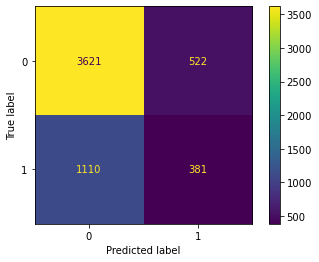



Confusion matrix for the test set
[[887 144]
 [283  95]]


E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\envs\DA_Envi\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


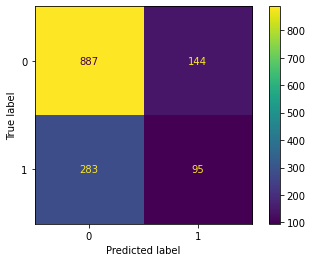

In [363]:

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()
